In [1]:
import numpy as np
import pandas as pd
import openpyxl

In [38]:
data = pd.read_excel("/Users/oktavianu/Data-Science/data-visualization/Canada.xlsx",
    sheet_name="Canada by Citizenship",
    skiprows=range(20),
    skipfooter=2)
data.head() # top five rows

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
data.tail() # bottom five rows

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


It is a good practice to always get the basic information about the dataframe:

In [14]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [15]:
# get list of column headers
data.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [16]:
# get the list of indices 
data.index

RangeIndex(start=0, stop=195, step=1)

Note: The default type of intance variables index and columns are NOT list.

In [17]:
print(type(data.columns))
print(type(data.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [18]:
# To view the dimensions of the dataframe, we use the shape instance variable of it.
data.shape

(195, 43)

Note: The main types stored in pandas objects are float, int, bool, datetime64[ns], datetime64[ns, tz], timedelta[ns], category, and object (string). In addition, these dtypes have item sizes, e.g. int64 and int32.

clean the data set to remove a few unnecessary columns. We can use pandas drop() method as follows:

In [39]:
# data.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
data.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


rename the columns so that they make sense. We can use rename() method by passing in a dictionary of old and new names as follows:

In [40]:
data.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
data.columns

Index([     'Type',  'Coverage',   'Country',      'AREA', 'Continent',
             'REG',    'Region',       'DEV',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [42]:
# add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013
data['Total'] = data.select_dtypes(include='number').sum(axis=1)
data

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,131954
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,36866
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,144312
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,5548
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,199806
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,5438
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,161,140,122,133,128,211,160,174,217,11488
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,91,77,71,64,60,102,69,46,59,8784


In [43]:
# check to see how many null objects we have in the dataset 
data.isnull().sum()

Type         0
Coverage     0
Country      0
AREA         0
Continent    0
REG          0
Region       0
DEV          0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [44]:
# quick summary of each column
data.describe()

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,7.186197e+04
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,1.840805e+05
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.438000e+03
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,7.437000e+03
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,1.739000e+04
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,4.994700e+04
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,1.398484e+06


In [45]:
data.describe(include='object')

,Type,Coverage,Country,Continent,Region,DevName
count,195,195,195,195,195,195
unique,1,2,195,6,22,2
top,Immigrants,Foreigners,Afghanistan,Africa,Western Asia,Developing regions
freq,195,194,1,54,18,147


## pandas Intermediate: Indexing and Selection (slicing)
There are two ways to filter on a column name:

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.

    df.column_name               # returns series

Method 2: More robust, and can filter on multiple columns.

    df['column']                  # returns series

    df[['column 1', 'column 2']]  # returns dataframe

In [46]:
# filtering on the list of countries ('Country').
data.Country # return a series

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [47]:
# filtering on the list of countries ('Country') and the data for years: 1980 - 1985.
data[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns dataframe

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


## Select row
There are main 2 ways to select rows:

    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column

The default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using set_index() method.

In [48]:
data.set_index('Country', inplace=True)
data.head(3)

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,131954
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,36866
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,144312


The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

View the number of immigrants from Japan (row 87) for the following scenarios: 1. The full row data (all columns) 2. For year 2013 3. For years 1980 to 1985

In [53]:
data.loc['Japan'] # return series

Type                Immigrants
Coverage            Foreigners
AREA                       935
Continent                 Asia
REG                        906
Region            Eastern Asia
DEV                        901
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004    

In [52]:
# alternate method
data.iloc[87] # return series

Type                Immigrants
Coverage            Foreigners
AREA                       935
Continent                 Asia
REG                        906
Region            Eastern Asia
DEV                        901
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004    

In [54]:
data[data.index == 'Japan'] # return dataframe

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Immigrants,Foreigners,935,Asia,906,Eastern Asia,901,Developed regions,701,756,...,1067,1212,1250,1284,1194,1168,1265,1214,982,60898


In [55]:
# specifik year
data.loc['Japan', 2013]

982

In [57]:
# alternate method
# year 2013 is the last column, with a positional index of 36
data.iloc[87, 36]

1284

In [58]:
data.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object

In [60]:
# Alternative Method
data.iloc[87, [3, 4, 5, 6, 7, 8]]

Continent                 Asia
REG                        906
Region            Eastern Asia
DEV                        901
DevName      Developed regions
1980                       701
Name: Japan, dtype: object

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.


In [66]:
data.columns = list(map(str, data.columns)) # convert header to string

[print (type(x)) for x in data.columns]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [68]:
years = list(map(str, range(1980, 2014))) # set variable for plotting later
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on a criteria

To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [70]:
# create condition boolean series:
condition = data['Continent'] == 'Asia'
print(condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [71]:
# pass the condition to dataframe
data[condition]

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,131954
Armenia,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,...,224,218,198,205,267,252,236,258,207,12138
Azerbaijan,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,0,...,359,236,203,125,165,209,138,161,57,10816
Bahrain,Immigrants,Foreigners,935,Asia,922,Western Asia,902,Developing regions,0,2,...,12,12,22,9,35,28,21,39,32,6468
Bangladesh,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,83,84,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,145812
Bhutan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,0,0,...,5,10,7,36,865,1464,1879,1075,487,26428
Brunei Darussalam,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,79,6,...,4,5,11,10,5,12,6,3,6,6714
Cambodia,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,12,19,...,370,529,460,354,203,200,196,233,288,18590
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1325410


We can pass multiple criteria in the same line.

Let's filter for AreaNAme = Asia and RegName = Southern Asia

In [72]:
data[(data['Continent']=='Asia') & (data['Region'] == 'Southern Asia')]

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,131954
Bangladesh,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,83,84,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,145812
Bhutan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,0,0,...,5,10,7,36,865,1464,1879,1075,487,26428
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1398484
Iran (Islamic Republic of),Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,1172,1429,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,366522
Maldives,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,0,0,...,0,0,2,1,7,4,3,1,1,14736
Nepal,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,1,1,...,607,540,511,581,561,1392,1129,1185,1308,35120
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,497876
Sri Lanka,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,185,371,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,311392


Note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'

don't forget to enclose the two conditions in parentheses

Review the changes we have made to our dataframe.

In [74]:
print('Data dimensions:', data.shape)
print(data.columns)
data.head(2)

Data dimensions: (195, 43)
Index(['Type', 'Coverage', 'AREA', 'Continent', 'REG', 'Region', 'DEV',
       'DevName', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       'Total'],
      dtype='object')


,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,131954
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,36866


## Visualizing Data Using Matplotlib
### Matplotlib: Standard Python Visualization Library
#### Matplotlib.Pyplot
One of the core aspects of Matplotlib is matplotlib.pyplot. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.

In [75]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [77]:
print("Matplotlib version:", mpl.__version__)

Matplotlib version: 3.9.2


In [84]:
# apply style to matplotlib, this is optional
for style in plt.style.available:
    print(style)
mpl.style.use(['ggplot'])

Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-v0_8
seaborn-v0_8-bright
seaborn-v0_8-colorblind
seaborn-v0_8-dark
seaborn-v0_8-dark-palette
seaborn-v0_8-darkgrid
seaborn-v0_8-deep
seaborn-v0_8-muted
seaborn-v0_8-notebook
seaborn-v0_8-paper
seaborn-v0_8-pastel
seaborn-v0_8-poster
seaborn-v0_8-talk
seaborn-v0_8-ticks
seaborn-v0_8-white
seaborn-v0_8-whitegrid
tableau-colorblind10


#### Plotting in pandas
Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in pandas is as simple as appending a .plot() method to a series or dataframe.

Documentation:

[Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/reference/index.html)

[Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/reference/index.html)


#### Line Plots (Series/Dataframe)
**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields. Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

Let's start with a case study:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

**Question**: Plot a line graph of immigration from Haiti using `df.plot()`.

First we need to extract data series for Haiti.

In [85]:
# extract data series for Haiti
haiti = data.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

In [86]:
# plot a line plot by appending .plot() to the haiti dataframe.
haiti.plot()

<Axes: >

pandas automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). However, notice how the years were not displayed because they are of type string. Therefore, let's change the type of the index values to integer for plotting.

Label the x and y axis using plt.title(), plt.ylabel(), and plt.xlabel() as follows:

In [90]:
haiti.index = haiti.index.map(int) # change the index values of Haiti to type integer for plotting


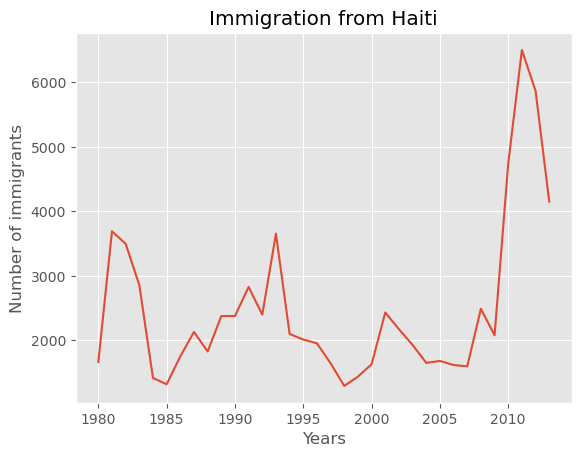

In [91]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the plt.text() method.

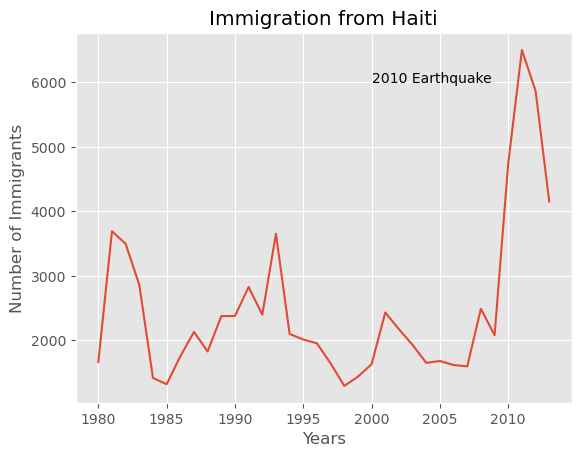

In [92]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in plt.text(x, y, label):

```python
Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.

plt.text(2000, 6000, '2010 Earthquake') # years stored as type int

If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.

plt.text(20, 6000, '2010 Earthquake') # years stored as type int
```

We will cover advanced annotation methods in later modules.

We can easily add more countries to line plot to make meaningful comparisons immigration from different countries.

**Question**: Let's compare the number of immigrants from India and China from 1980 to 2013.

In [101]:
# Step 1: Get the data set for China and India, and display the dataframe.
china_india = data.loc[['China', 'India'], years]
china_india

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [102]:
# Step 2: Plot graph. We will explicitly specify line plot by passing in kind parameter to plot().

china_india.plot(kind="line")

<Axes: xlabel='Country'>

That doesn't look right...

Recall that pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. Since df_CI is a dataframe with the country as the index and years as the columns, we must first transpose the dataframe using transpose() method to swap the row and columns.


In [107]:
china_india = china_india.transpose()

In [109]:
china_india.head(5)

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


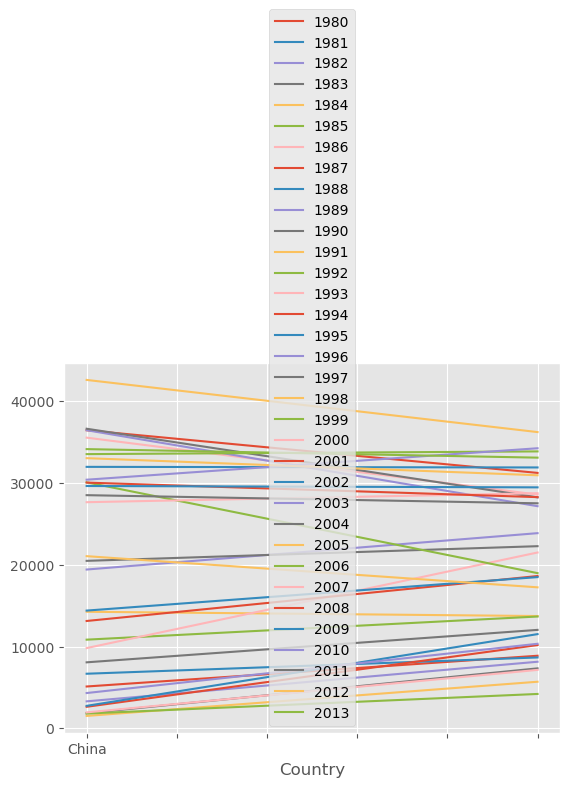

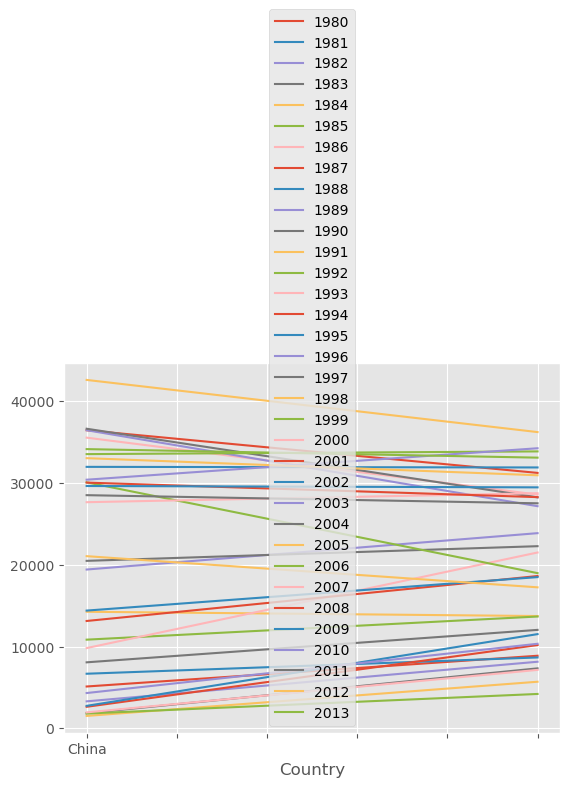

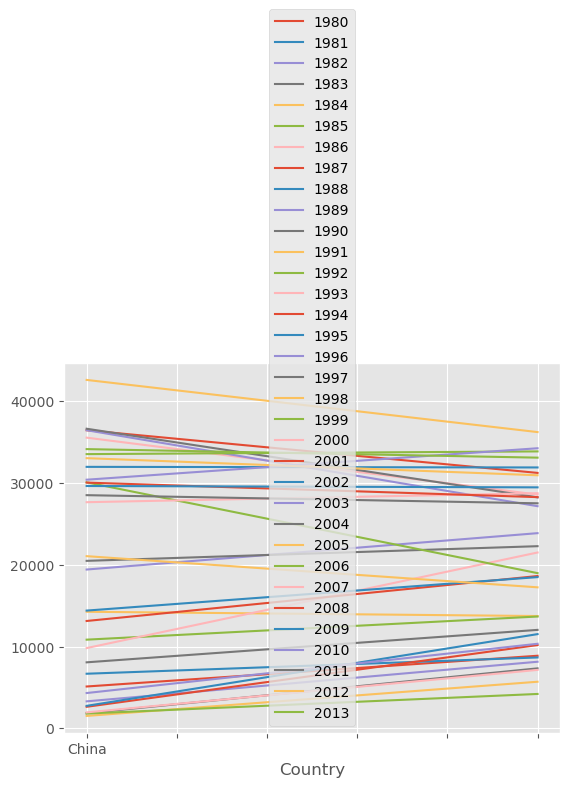

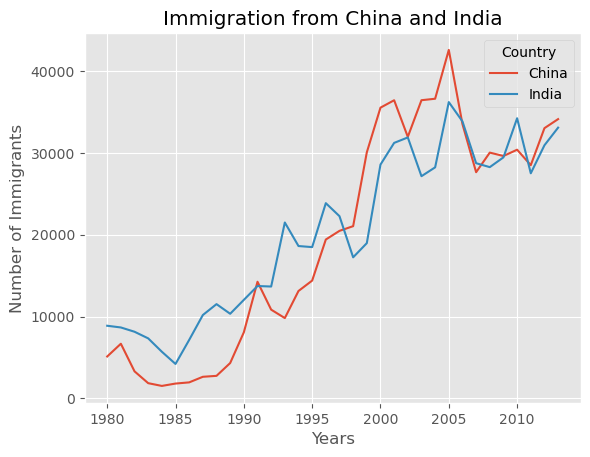

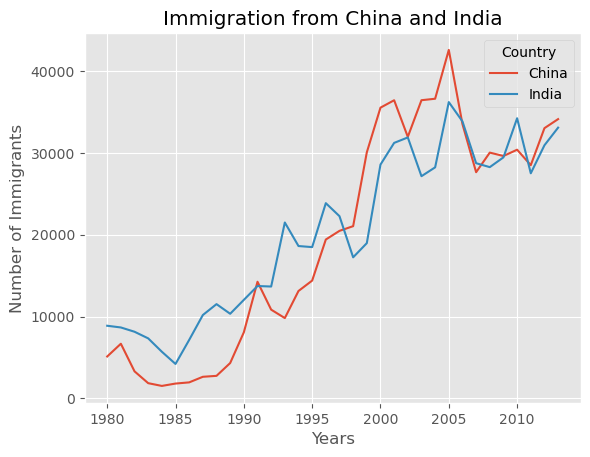

In [111]:
china_india.plot(kind='line')

plt.title('Immigration from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
# plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

From the above plot, we can observe that the China and India have very similar immigration trends through the years.

Note: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

That's because haiti is a series as opposed to a dataframe, and has the years as its indices as shown below.

In [112]:
print(type(haiti))
print(haiti.head(5))

<class 'pandas.core.series.Series'>
1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object


Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

**Question**: Compare the trend of top 5 countries that contributed the most to immigration to Canada.

**Step 1**: Get the dataset. Recall that we created a Total column that calculates cumulative immigration by country. 

We will sort on this column to get our top 5 countries using pandas sort_values() method.

In [113]:
inplace = True # paramemter saves the changes to the original data dataframe

In [114]:
data.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# top 5 entries
top5_data = data.head(5)

# transpose dataframe
top5_data = top5_data[years].transpose()

print(top5_data)

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

**Step 2**: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.

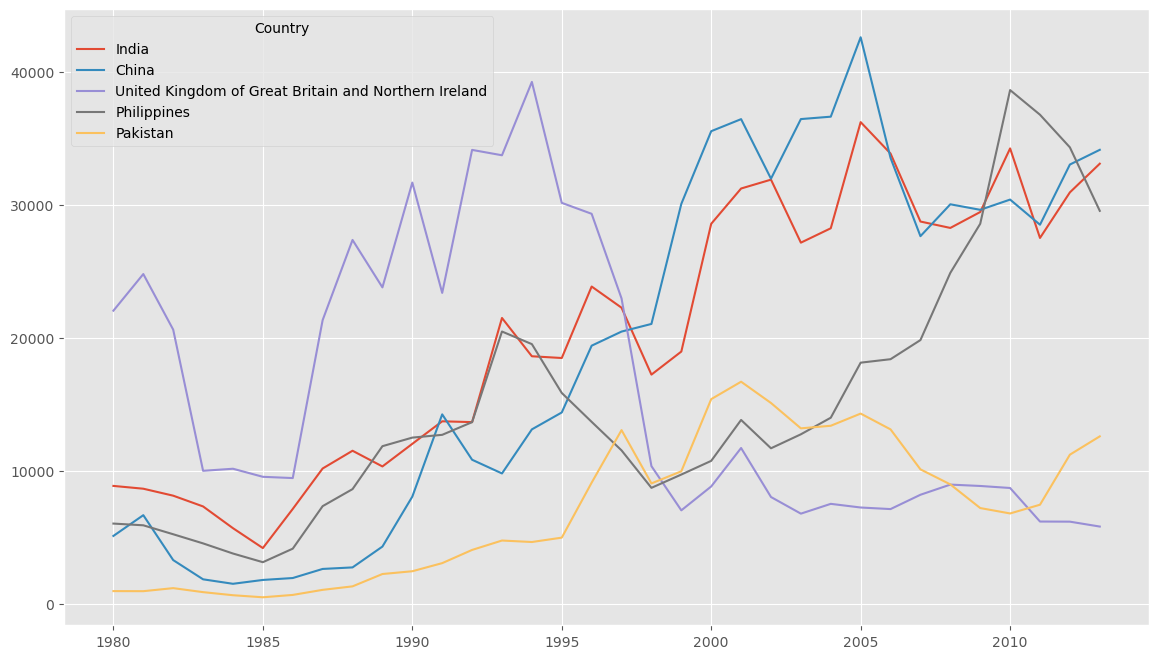

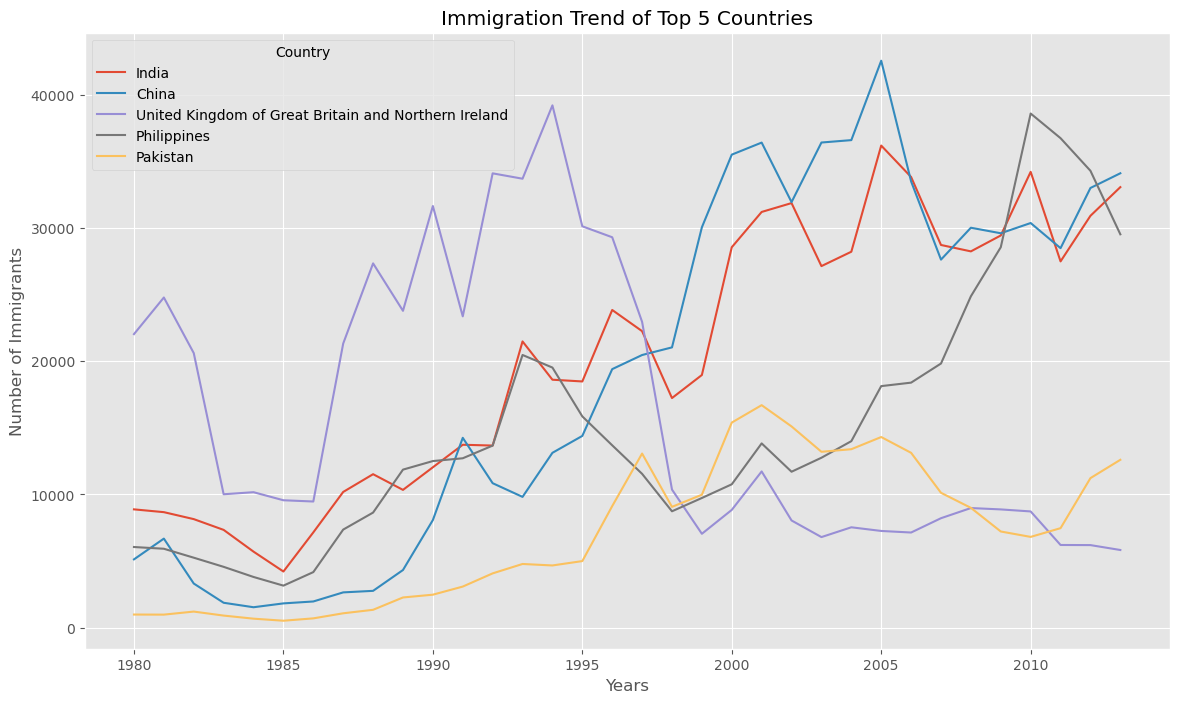

In [116]:
top5_data.index = top5_data.index.map(int) # change the index values of top5_data to type integer for plotting
top5_data.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) 

plt.title("Immigration Trend of Top 5 Countries")
plt.ylabel("Number of Immigrants")
plt.xlabel("Years")

plt.show()